In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
lot_df = pd.read_csv('lottery_data_results.csv', index_col=False)
ny_df = pd.read_csv('ny_data_results.csv', index_col=False)
mar_df = pd.read_csv('mar_data_results.csv', index_col=False)
youngest_df = pd.read_csv('youngest_data_results.csv', index_col=False)
sickest_df = pd.read_csv('sickest_data_results.csv', index_col=False)
max_lives_df = pd.read_csv('max_lives_data_results.csv', index_col=False)

### AA

In [3]:
def percent_diff(row):
    return ( (row.death_counts - row.lag_counts) / row.death_counts  ) * 100

In [4]:
def absolute_deviation(median, row):
    return abs(median - row.percent_difference)

In [5]:
def modified_zscore(median, row):
    return (0.6745 * (row.percent_difference - median)) / row.MAD

In [6]:
all_df_list = []

#### Lottery

In [7]:
hispanic_df = lot_df[lot_df['race'] == 'Black or African American']
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Lottery'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Black or African American,50.000,0.0,487.000,76.923077,NaN,46.211,3.789,7.578000,Lottery,11.692189,8.539741,-0.923492,0
18,Black or African American,46.211,0.1,437.899,71.093846,NaN,40.615,5.596,12.109671,Lottery,7.160518,8.539741,-0.565564,0
24,Black or African American,40.615,0.2,400.117,62.484615,NaN,36.817,3.798,9.351225,Lottery,9.918964,8.539741,-0.783436,0
32,Black or African American,36.817,0.3,360.875,56.641538,NaN,31.409,5.408,14.688867,Lottery,4.581322,8.539741,-0.361850,0
41,Black or African American,31.409,0.4,318.644,48.321538,NaN,26.572,4.837,15.400045,Lottery,3.870144,8.539741,-0.305678,0
48,Black or African American,26.572,0.5,272.878,40.880000,NaN,20.259,6.313,23.758091,Lottery,4.487903,8.539741,0.354471,0
57,Black or African American,20.259,0.6,222.977,31.167692,NaN,15.571,4.688,23.140333,Lottery,3.870144,8.539741,0.305678,0
66,Black or African American,15.571,0.7,177.051,23.955385,NaN,10.732,4.839,31.077002,Lottery,11.806813,8.539741,0.932545,0
74,Black or African American,10.732,0.8,124.517,16.510769,NaN,6.220,4.512,42.042490,Lottery,22.772301,8.539741,1.798640,0
81,Black or African American,6.220,0.9,74.190,9.569231,NaN,3.874,2.346,37.717042,Lottery,18.446853,8.539741,1.457000,0


#### New York

In [8]:
hispanic_df = ny_df[ny_df['race'] == 'Black or African American']
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'New York'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,45.624,4.376,8.752000,New York,6.031117,5.574387,-0.729764,0
17,Black or African American,45.624,0.1,433.050,70.190769,NaN,43.213,2.411,5.284499,New York,9.498618,5.574387,-1.149331,0
25,Black or African American,43.213,0.2,378.396,66.481538,NaN,37.971,5.242,12.130609,New York,2.652509,5.574387,-0.320953,0
32,Black or African American,37.971,0.3,324.595,58.416923,NaN,33.632,4.339,11.427142,New York,3.355976,5.574387,-0.406073,0
42,Black or African American,33.632,0.4,279.014,51.741538,NaN,30.214,3.418,10.162940,New York,4.620177,5.574387,-0.559041,0
52,Black or African American,30.214,0.5,233.655,46.483077,NaN,24.946,5.268,17.435626,New York,2.652509,5.574387,0.320953,0
58,Black or African American,24.946,0.6,191.496,38.378462,NaN,19.827,5.119,20.520324,New York,5.737207,5.574387,0.694201,0
65,Black or African American,19.827,0.7,149.028,30.503077,NaN,15.823,4.004,20.194684,New York,5.411567,5.574387,0.654799,0
70,Black or African American,15.823,0.8,104.948,24.343077,NaN,10.028,5.795,36.623902,New York,21.840785,5.574387,2.642732,0
81,Black or African American,10.028,0.9,67.037,15.427692,NaN,3.904,6.124,61.069007,New York,46.285889,5.574387,5.600586,1


#### Maryland

In [9]:
hispanic_df = mar_df[mar_df['race'] == 'Black or African American']
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Maryland'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Black or African American,50.000,0.0,487.000,76.923077,NaN,48.012,1.988,3.976000,Maryland,9.909119,9.554042,-0.699568,0
17,Black or African American,48.012,0.1,432.379,73.864615,NaN,42.064,5.948,12.388570,Maryland,1.496550,9.554042,-0.105654,0
24,Black or African American,42.064,0.2,379.791,64.713846,NaN,39.174,2.890,6.870483,Maryland,7.014636,9.554042,-0.495222,0
35,Black or African American,39.174,0.3,330.041,60.267692,NaN,38.347,0.827,2.111094,Maryland,11.774025,9.554042,-0.831227,0
42,Black or African American,38.347,0.4,288.334,58.995385,NaN,36.550,1.797,4.686155,Maryland,9.198964,9.554042,-0.649432,0
48,Black or African American,36.550,0.5,243.638,56.230769,NaN,30.928,5.622,15.381669,Maryland,1.496550,9.554042,0.105654,0
57,Black or African American,30.928,0.6,208.782,47.581538,NaN,24.292,6.636,21.456286,Maryland,7.571166,9.554042,0.534512,0
64,Black or African American,24.292,0.7,157.018,37.372308,NaN,16.734,7.558,31.113124,Maryland,17.228004,9.554042,1.216269,0
72,Black or African American,16.734,0.8,106.540,25.744615,NaN,9.675,7.059,42.183578,Maryland,28.298459,9.554042,1.997826,0
78,Black or African American,9.675,0.9,72.091,14.884615,NaN,3.871,5.804,59.989664,Maryland,46.104545,9.554042,3.254907,0


#### Youngest

In [10]:
hispanic_df = youngest_df[youngest_df['race'] == 'Black or African American']
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Youngest First'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,49.306,0.694,1.388000,Youngest First,15.575916,8.772005,-1.197669,0
18,Black or African American,49.306,0.1,449.971,75.855385,NaN,45.449,3.857,7.822577,Youngest First,9.141339,8.772005,-0.702899,0
23,Black or African American,45.449,0.2,406.845,69.921538,NaN,41.558,3.891,8.561244,Youngest First,8.402672,8.772005,-0.646101,0
34,Black or African American,41.558,0.3,363.732,63.935385,NaN,34.486,7.072,17.017181,Youngest First,0.053265,8.772005,0.004096,0
42,Black or African American,34.486,0.4,326.387,53.055385,NaN,33.677,0.809,2.345879,Youngest First,14.618037,8.772005,-1.124015,0
46,Black or African American,33.677,0.5,282.179,51.810769,NaN,27.982,5.695,16.910651,Youngest First,0.053265,8.772005,-0.004096,0
56,Black or African American,27.982,0.6,242.113,43.049231,NaN,22.092,5.890,21.049246,Youngest First,4.085330,8.772005,0.314131,0
66,Black or African American,22.092,0.7,193.757,33.987692,NaN,17.531,4.561,20.645483,Youngest First,3.681567,8.772005,0.283084,0
72,Black or African American,17.531,0.8,141.023,26.970769,NaN,12.853,4.678,26.684159,Youngest First,9.720243,8.772005,0.747412,0
80,Black or African American,12.853,0.9,90.302,19.773846,NaN,3.866,8.987,69.921419,Youngest First,52.957503,8.772005,4.072026,1


#### Max Life Years

In [11]:
hispanic_df = max_lives_df[max_lives_df['race'] == 'Black or African American']
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Max Life Years'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)

all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,47.030,2.970,5.940000,Max Life Years,9.821031,10.415512,-0.636002,0
18,Black or African American,47.030,0.1,432.386,72.353846,NaN,42.075,4.955,10.535828,Max Life Years,5.225203,10.415512,-0.338380,0
25,Black or African American,42.075,0.2,382.825,64.730769,NaN,40.076,1.999,4.751040,Max Life Years,11.009992,10.415512,-0.712998,0
33,Black or African American,40.076,0.3,330.027,61.655385,NaN,38.285,1.791,4.469009,Max Life Years,11.292023,10.415512,-0.731262,0
40,Black or African American,38.285,0.4,288.270,58.900000,NaN,31.779,6.506,16.993601,Max Life Years,1.232569,10.415512,0.079820,0
50,Black or African American,31.779,0.5,252.318,48.890769,NaN,27.162,4.617,14.528462,Max Life Years,1.232569,10.415512,-0.079820,0
57,Black or African American,27.162,0.6,212.753,41.787692,NaN,22.413,4.749,17.483985,Max Life Years,1.722954,10.415512,0.111577,0
65,Black or African American,22.413,0.7,162.949,34.481538,NaN,15.762,6.651,29.674742,Max Life Years,13.913711,10.415512,0.901041,0
73,Black or African American,15.762,0.8,108.336,24.249231,NaN,11.500,4.262,27.039716,Max Life Years,11.278684,10.415512,0.730398,0
80,Black or African American,11.500,0.9,72.093,17.692308,NaN,3.878,7.622,66.278261,Max Life Years,50.517229,10.415512,3.271454,0


#### Sickest First

In [12]:
hispanic_df = sickest_df[sickest_df['race'] == 'Black or African American']
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Sickest First'

med = hispanic_df['percent_difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,43.435,6.565,13.130000,Sickest First,3.803585,6.613464,-0.387924,0
17,Black or African American,43.435,0.1,454.482,66.823077,NaN,37.096,6.339,14.594221,Sickest First,2.339364,6.613464,-0.238589,0
25,Black or African American,37.096,0.2,413.206,57.070769,NaN,34.310,2.786,7.510244,Sickest First,9.423342,6.613464,-0.961076,0
35,Black or African American,34.310,0.3,369.298,52.784615,NaN,28.692,5.618,16.374235,Sickest First,0.559351,6.613464,-0.057048,0
38,Black or African American,28.692,0.4,319.314,44.141538,NaN,23.090,5.602,19.524606,Sickest First,2.591021,6.613464,0.264255,0
48,Black or African American,23.090,0.5,280.011,35.523077,NaN,16.570,6.520,28.237332,Sickest First,11.303747,6.613464,1.152857,0
57,Black or African American,16.570,0.6,234.317,25.492308,NaN,15.572,0.998,6.022933,Sickest First,10.910652,6.613464,-1.112766,0
64,Black or African American,15.572,0.7,190.084,23.956923,NaN,12.848,2.724,17.492936,Sickest First,0.559351,6.613464,0.057048,0
72,Black or African American,12.848,0.8,142.671,19.766154,NaN,7.723,5.125,39.889477,Sickest First,22.955891,6.613464,2.341247,0
78,Black or African American,7.723,0.9,91.131,11.881538,NaN,3.910,3.813,49.372006,Sickest First,32.438420,6.613464,3.308359,0


### Plots For Difference

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Difference Plot For Black Patients')

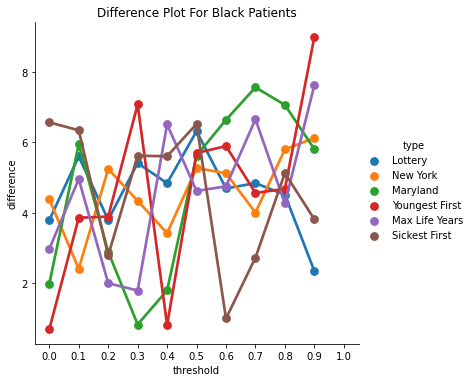

In [13]:
all_df = pd.concat(all_df_list)
type_labels = all_df['type'].unique()
sn_plot = sn.factorplot(x='threshold', y='difference', 
                        hue_order = type_labels, hue='type', data=all_df)
plt.title('Difference Plot For Black Patients')